# Pitch shifting exploration


This is to explore the effects of the OfflineDataAugmentation.pitch_shift


Import the necessary libraries


In [8]:
import torch
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import random

In [9]:
from OfflineDataAugmentation import OfflineDataAugmentation

Set the seed for reproducability


In [10]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if (torch.cuda.is_available()):
    torch.cuda.manual_seed(random_seed)

Set some constant strings


In [11]:
root_dir = '../../data/'
test_set = 'test_dataset.csv'

Load the test set


In [12]:
df = pd.read_csv(os.path.join(root_dir, test_set))

# Check first few rows to confirm data is loaded correctly
print(df.head())

   Id    Dataset                                           Filepath  \
0   0      MLEND          ./dataset/mlend\MLEndSND_Public\01620.wav   
1   1  JL-CORPUS  ./dataset/jl-corpus/Raw JL corpus (unchecked a...   
2   2      MLEND          ./dataset/mlend\MLEndSND_Public\04997.wav   
3   3        ESD        ./dataset/esd\0018\Surprise\0018_001454.wav   
4   4      MLEND          ./dataset/mlend\MLEndSND_Public\05521.wav   

             Filename   Ext  Duration   Emotion  
0           01620.wav  .wav  1.578957   Neutral  
1  male1_sad_5a_1.wav  .wav  2.350000       Sad  
2           04997.wav  .wav  1.172608  Question  
3     0018_001454.wav  .wav  2.836000  Surprise  
4           05521.wav  .wav  1.462857   Neutral  


Randomly select one speech sample from the test set


In [13]:
selected_rows = df.sample(n=5, random_state=24)

# Extracting filepaths
random_filepaths = selected_rows['Filepath'].tolist()
random_filepaths = [os.path.join(root_dir, x.replace('\\', '/'))
                    for x in random_filepaths]

print("Randomly selected files:")
for filepath in random_filepaths:
    print(filepath)

Randomly selected files:
../../data/./dataset/meld/train/dia684_utt1.mp4
../../data/./dataset/mlend/MLEndSND_Public/23409.wav
../../data/./dataset/esd/0016/Angry/0016_000632.wav
../../data/./dataset/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)/female2_angry_2b_2.wav
../../data/./dataset/mlend/MLEndSND_Public/20459.wav


Observe the effects of pitch shifting


Original audio sample: ../../data/./dataset/meld/train/dia684_utt1.mp4


/var/folders/ft/gzvmkgdj727g157scc1xw9f80000gn/T/ipykernel_80687/1811076682.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(random_filepath, sr=16000)
/Users/limfuoen/anaconda3/envs/artificial-intelligence/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


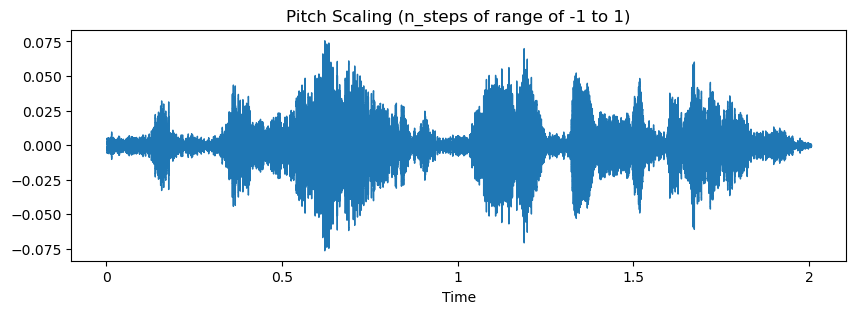

Pitch-scaled audio sample with n_steps of range of -1 to 1


-----------------------------


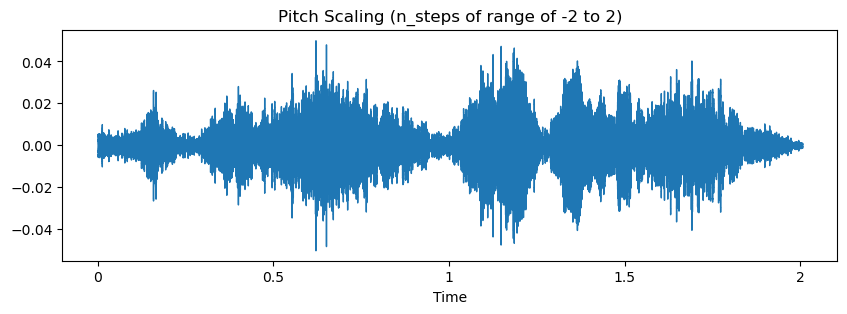

Pitch-scaled audio sample with n_steps of range of -2 to 2


-----------------------------


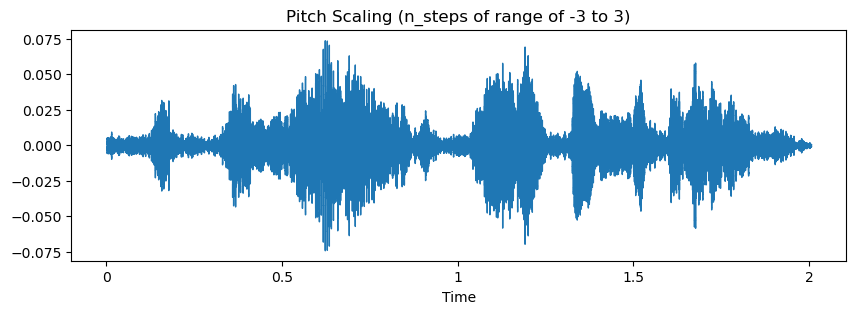

Pitch-scaled audio sample with n_steps of range of -3 to 3


-----------------------------


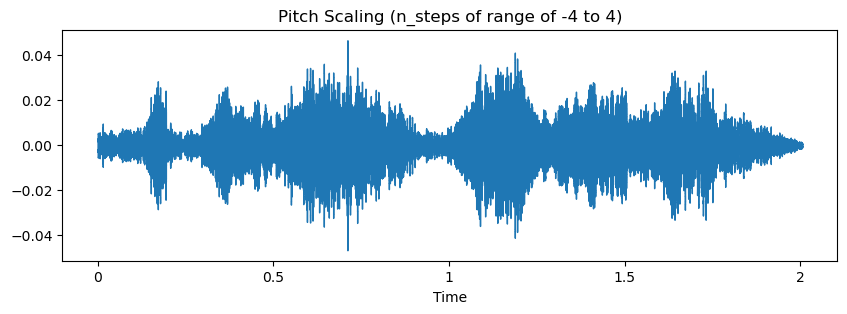

Pitch-scaled audio sample with n_steps of range of -4 to 4


-----------------------------


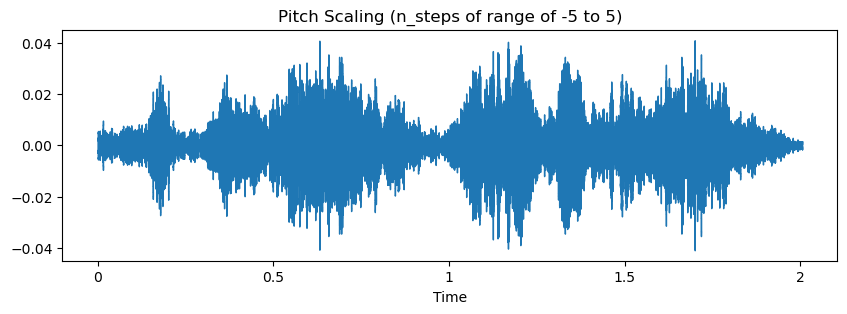

Pitch-scaled audio sample with n_steps of range of -5 to 5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/mlend/MLEndSND_Public/23409.wav


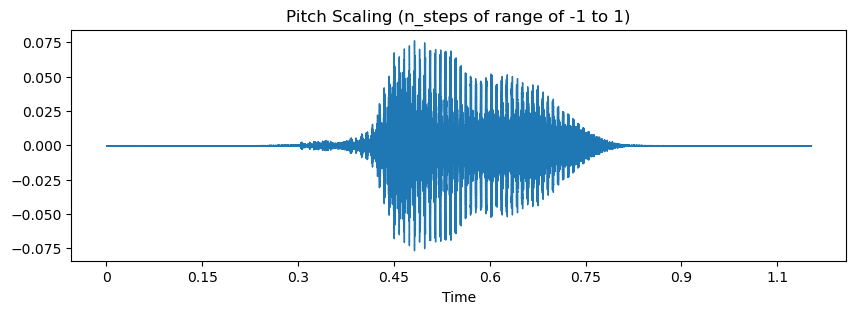

Pitch-scaled audio sample with n_steps of range of -1 to 1


-----------------------------


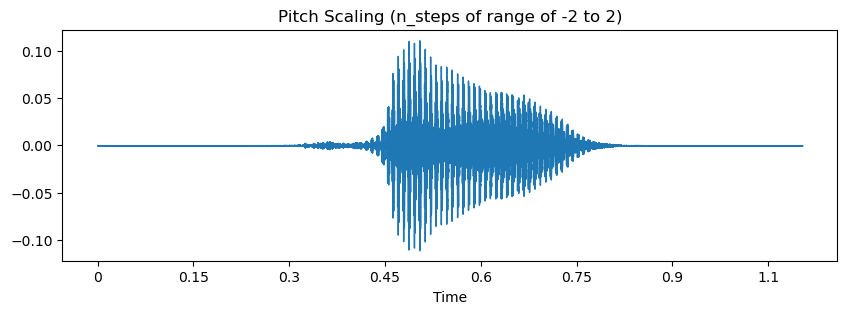

Pitch-scaled audio sample with n_steps of range of -2 to 2


-----------------------------


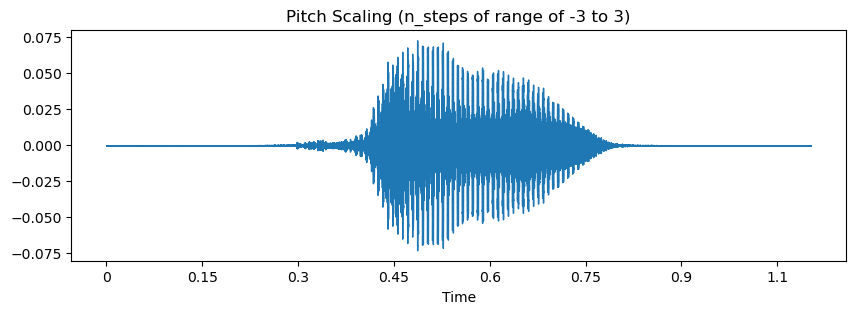

Pitch-scaled audio sample with n_steps of range of -3 to 3


-----------------------------


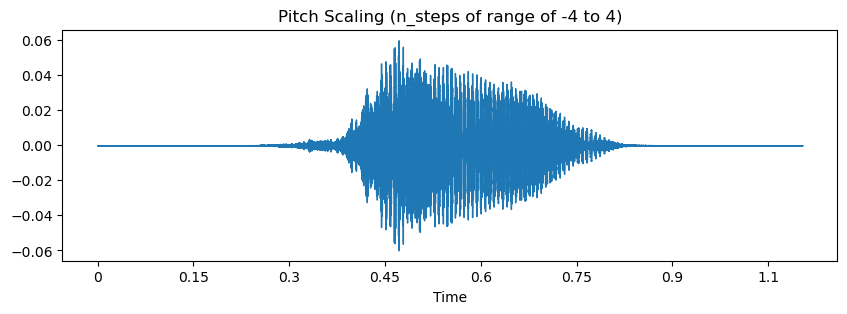

Pitch-scaled audio sample with n_steps of range of -4 to 4


-----------------------------


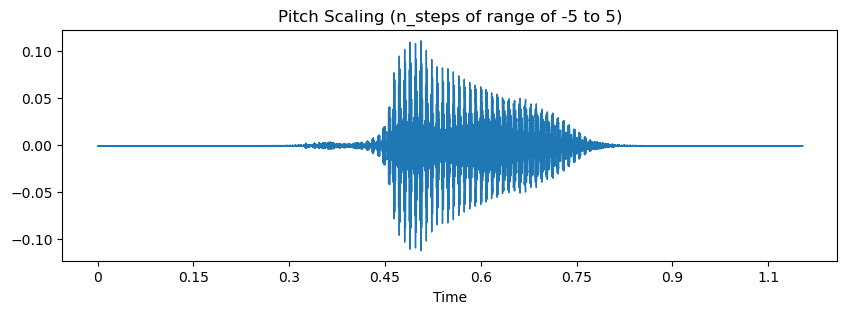

Pitch-scaled audio sample with n_steps of range of -5 to 5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/esd/0016/Angry/0016_000632.wav


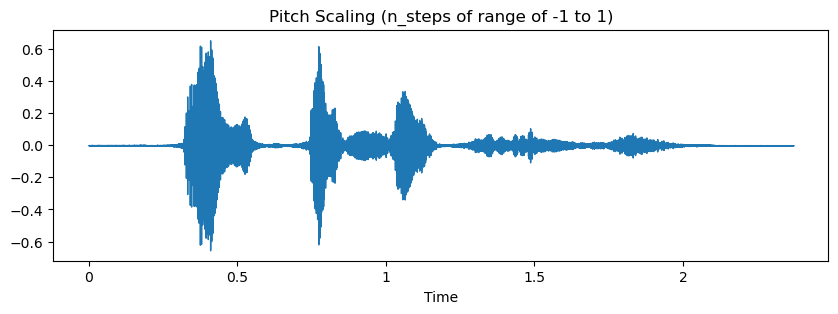

Pitch-scaled audio sample with n_steps of range of -1 to 1


-----------------------------


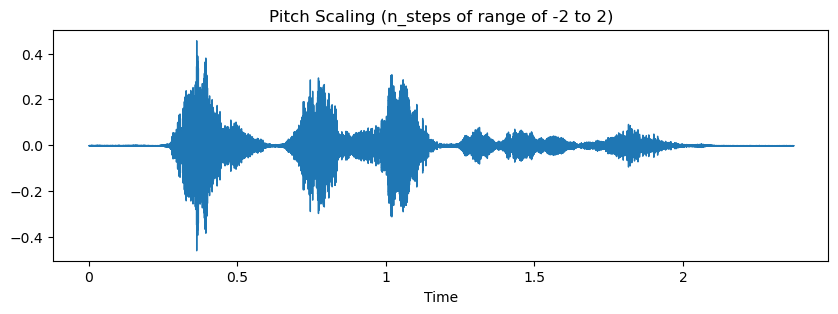

Pitch-scaled audio sample with n_steps of range of -2 to 2


-----------------------------


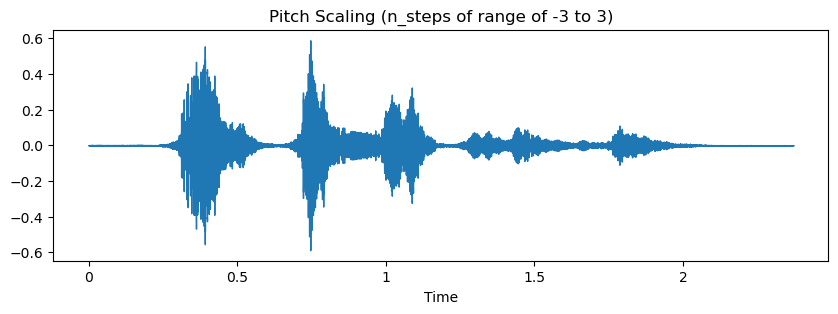

Pitch-scaled audio sample with n_steps of range of -3 to 3


-----------------------------


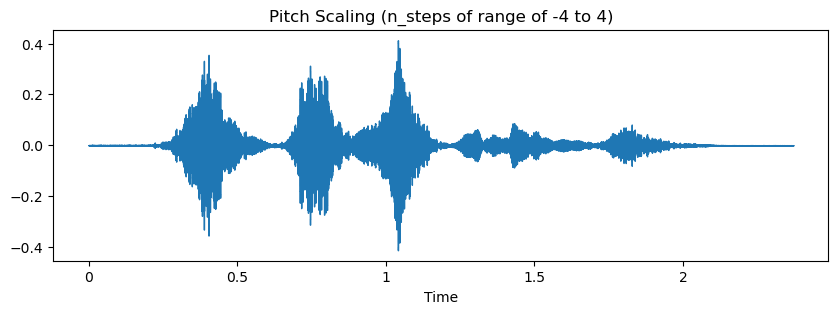

Pitch-scaled audio sample with n_steps of range of -4 to 4


-----------------------------


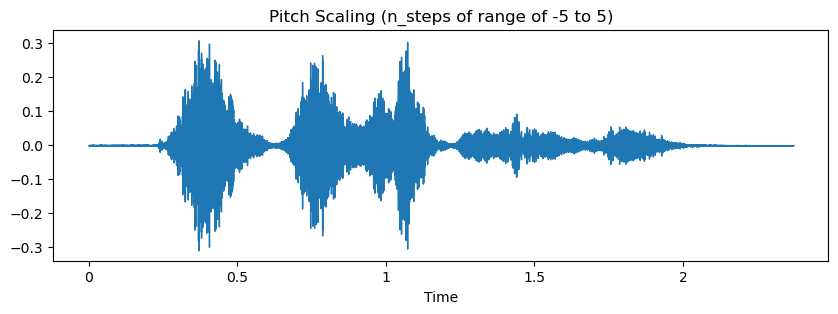

Pitch-scaled audio sample with n_steps of range of -5 to 5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/jl-corpus/Raw JL corpus (unchecked and unannotated)/JL(wav+txt)/female2_angry_2b_2.wav


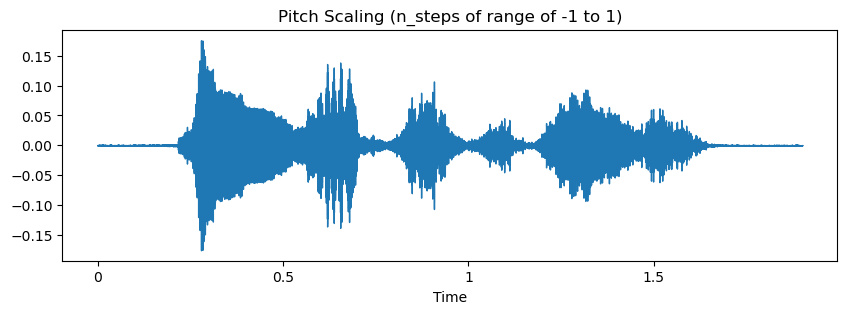

Pitch-scaled audio sample with n_steps of range of -1 to 1


-----------------------------


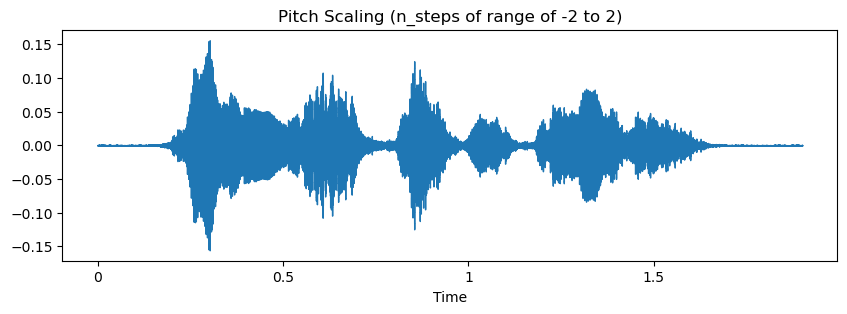

Pitch-scaled audio sample with n_steps of range of -2 to 2


-----------------------------


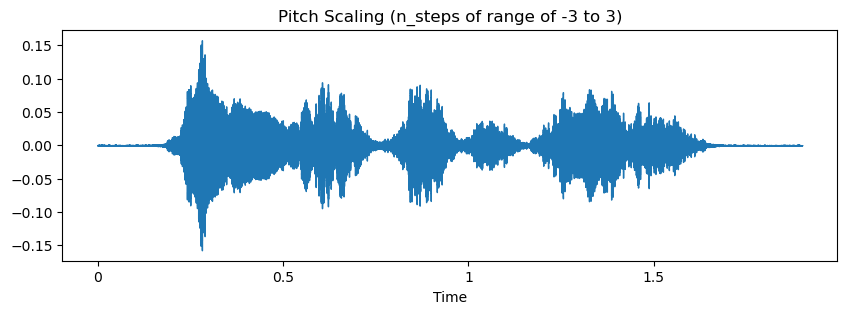

Pitch-scaled audio sample with n_steps of range of -3 to 3


-----------------------------


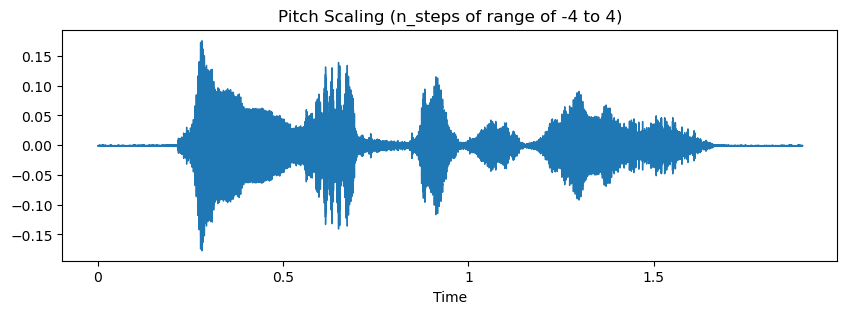

Pitch-scaled audio sample with n_steps of range of -4 to 4


-----------------------------


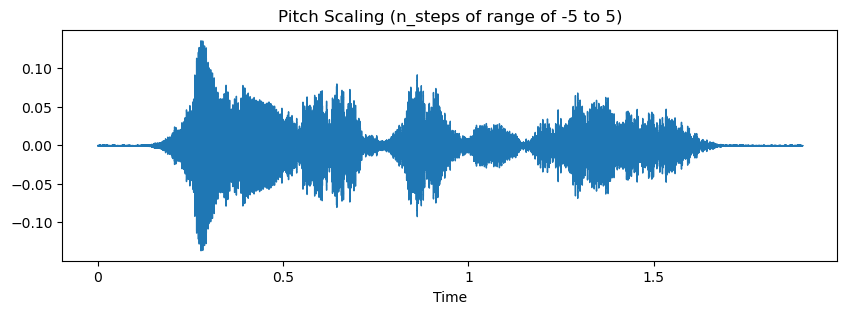

Pitch-scaled audio sample with n_steps of range of -5 to 5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Original audio sample: ../../data/./dataset/mlend/MLEndSND_Public/20459.wav


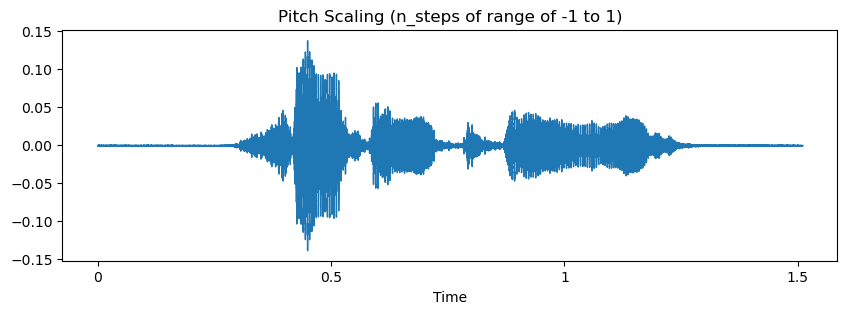

Pitch-scaled audio sample with n_steps of range of -1 to 1


-----------------------------


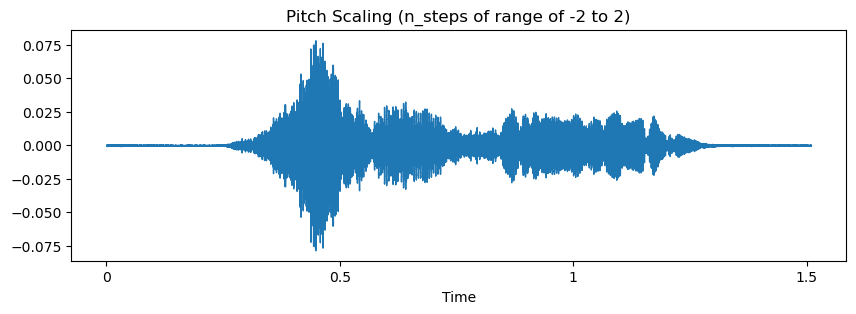

Pitch-scaled audio sample with n_steps of range of -2 to 2


-----------------------------


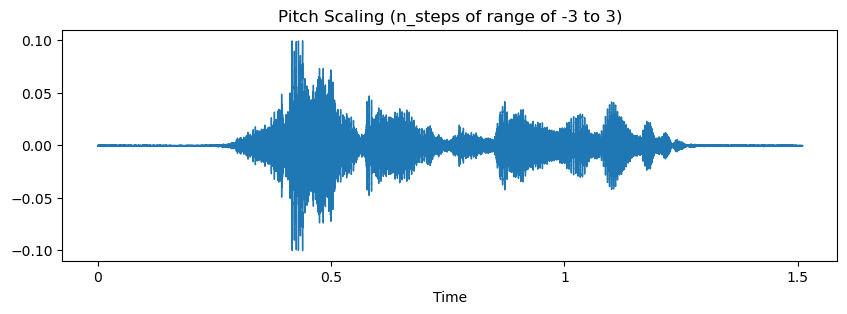

Pitch-scaled audio sample with n_steps of range of -3 to 3


-----------------------------


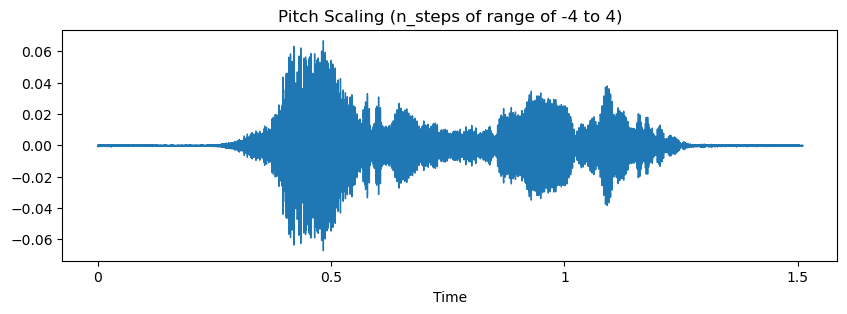

Pitch-scaled audio sample with n_steps of range of -4 to 4


-----------------------------


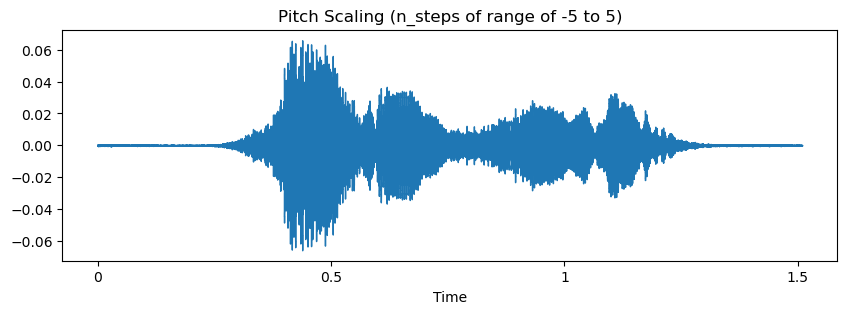

Pitch-scaled audio sample with n_steps of range of -5 to 5


-----------------------------
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [ ]:
for random_filepath in random_filepaths:
    # Load an audio example
    y, sr = librosa.load(random_filepath, sr=16000)

    print(f'Original audio sample: {random_filepath}')
    display(ipd.Audio(torch.tensor(y).numpy(), rate=sr))

    # Experiment with a range of values
    n_steps_values = [1, 2, 3, 4, 5]

    for n_steps in n_steps_values:
        scaled_audio = OfflineDataAugmentation.pitch_shift(
            y, sr=sr, n_steps_range=(-n_steps, n_steps))

        # Visualize waveform
        plt.figure(figsize=(10, 3))
        librosa.display.waveshow(scaled_audio, sr=sr)
        plt.title(
            f"Pitch Scaling (n_steps of range of {-n_steps} to {n_steps})")
        plt.show()

        print(
            f'Pitch-scaled audio sample with n_steps of range of {-n_steps} to {n_steps}')
        # Listen to audio
        display(ipd.Audio(scaled_audio, rate=sr))
        print('-----------------------------')

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')